In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from gmfs_vh import gmf_rs2_v2, gmf_s1_v2, gmf_rcm_noaa
from gmfs_vh import gmf_rs2_v4, gmf_s1_v3_ew_rec, gmf_rcm_v4

import os, pickle as pkl


In [4]:
incidence = np.arange(17,50)
windspeed = np.arange(3,80,0.2)  

# OLD GMF (ms1ahw)

In [5]:
path = "./GMF_cmodms1ahw/"

sigma0_db = np.ascontiguousarray(np.transpose(np.load(os.path.join(path, 'sigma.npy'))))
inc = pkl.load(open(os.path.join(path, 'incidence_angle.pkl'), 'rb'), encoding='iso-8859-1')
wspd = pkl.load(open(os.path.join(path, 'wind_speed.pkl'), 'rb'), encoding='iso-8859-1')

In [6]:
sigma0_ms1ahw_dB = xr.DataArray(sigma0_db, dims=('wspd','inc'), coords = (wspd,inc))
final_dims = ('inc','wspd')
sigma0_ms1ahw_dB = sigma0_ms1ahw_dB.transpose(*final_dims)
sigma0_ms1ahw_dB.name = 'sigma0_gmf'
sigma0_ms1ahw_dB.attrs['units'] = 'dB'
sigma0_ms1ahw_dB.attrs['model'] = "ms1ahw"
sigma0_ms1ahw_dB.attrs['resolution'] = 'high'
sigma0_ms1ahw_dB

<xarray.DataArray 'sigma0_gmf' (inc: 331, wspd: 771)> Size: 2MB
array([[-36.95953077, -36.72741162, -36.50266258, ..., -16.30085821,
        -16.29585444, -16.29085693],
       [-36.95953077, -36.72741162, -36.50266258, ..., -16.30085821,
        -16.29585444, -16.29085693],
       [-36.95953077, -36.72741162, -36.50266258, ..., -16.30085821,
        -16.29585444, -16.29085693],
       ...,
       [-42.97392564, -42.69338899, -42.42175979, ..., -16.05302437,
        -16.04568189, -16.03834858],
       [-42.97392564, -42.69338899, -42.42175979, ..., -16.05302437,
        -16.04568189, -16.03834858],
       [-42.97392564, -42.69338899, -42.42175979, ..., -16.05302437,
        -16.04568189, -16.03834858]])
Coordinates:
  * wspd     (wspd) float64 6kB 3.0 3.1 3.2 3.3 3.4 ... 79.6 79.7 79.8 79.9 80.0
  * inc      (inc) float64 3kB 17.0 17.1 17.2 17.3 17.4 ... 49.7 49.8 49.9 50.0
Attributes:
    units:       dB
    model:       ms1ahw
    resolution:  high

# RS2 v2 

In [7]:
sigma0_rs2_v2 = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")

for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_rs2_v2[i_inc, i_wspd] = gmf_rs2_v2(one_inc, one_wspd)
sigma0_rs2_v2.attrs['units'] = 'linear'
sigma0_rs2_v2.attrs['model'] = "rs2_v2"
sigma0_rs2_v2.attrs['resolution'] = 'low'
sigma0_rs2_v2

<xarray.DataArray 'nrcs_vh' (inc: 33, wspd: 385)> Size: 102kB
array([[8.26105368e-05, 9.54246277e-05, 1.09277205e-04, ...,
        2.56052146e-02, 2.56887540e-02, 2.57723593e-02],
       [8.13457982e-05, 9.38903256e-05, 1.07440832e-04, ...,
        2.57304020e-02, 2.58149244e-02, 2.58995151e-02],
       [8.00977518e-05, 9.23774532e-05, 1.05631463e-04, ...,
        2.58136625e-02, 2.58990141e-02, 2.59844361e-02],
       ...,
       [5.17108292e-05, 5.82893750e-05, 6.52314846e-05, ...,
        1.61280122e-02, 1.61858811e-02, 1.62438119e-02],
       [5.09224932e-05, 5.73521367e-05, 6.41315445e-05, ...,
        1.56812601e-02, 1.57375059e-02, 1.57938118e-02],
       [5.01488592e-05, 5.64329394e-05, 6.30534293e-05, ...,
        1.52506538e-02, 1.53053238e-02, 1.53600520e-02]])
Coordinates:
  * inc      (inc) int64 264B 17 18 19 20 21 22 23 24 ... 43 44 45 46 47 48 49
  * wspd     (wspd) float64 3kB 3.0 3.2 3.4 3.6 3.8 ... 79.0 79.2 79.4 79.6 79.8
Attributes:
    units:       linear
    model:       rs2_v2
    resolution:  low

# RS2 v4

In [8]:
sigma0_rs2_v4 = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")

for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_rs2_v4[i_inc, i_wspd] = gmf_rs2_v4(one_inc, one_wspd)
sigma0_rs2_v4.attrs['units'] = 'linear'
sigma0_rs2_v4.attrs['model'] = "rs2_v4"
sigma0_rs2_v4.attrs['resolution'] = 'low'
sigma0_rs2_v4

<xarray.DataArray 'nrcs_vh' (inc: 33, wspd: 385)> Size: 102kB
array([[9.53096629e-05, 1.09681076e-04, 1.25152807e-04, ...,
        4.05722039e-02, 4.07177878e-02, 4.08635270e-02],
       [9.34977810e-05, 1.07492005e-04, 1.22543084e-04, ...,
        3.88320247e-02, 3.89713558e-02, 3.91108354e-02],
       [9.17192488e-05, 1.05345899e-04, 1.19987570e-04, ...,
        3.72539246e-02, 3.73876557e-02, 3.75215296e-02],
       ...,
       [5.17831547e-05, 5.79498409e-05, 6.44073511e-05, ...,
        2.32279889e-02, 2.33303371e-02, 2.34328779e-02],
       [5.05896421e-05, 5.65598069e-05, 6.28052613e-05, ...,
        2.30509397e-02, 2.31538142e-02, 2.32568880e-02],
       [4.94065561e-05, 5.51836010e-05, 6.12208671e-05, ...,
        2.28594520e-02, 2.29628109e-02, 2.30663761e-02]])
Coordinates:
  * inc      (inc) int64 264B 17 18 19 20 21 22 23 24 ... 43 44 45 46 47 48 49
  * wspd     (wspd) float64 3kB 3.0 3.2 3.4 3.6 3.8 ... 79.0 79.2 79.4 79.6 79.8
Attributes:
    units:       linear
    model:       rs2_v4
    resolution:  low

# S1

In [9]:
sigma0_s1 = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")

for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_s1[i_inc, i_wspd] = gmf_s1_v2(one_inc, one_wspd)
sigma0_s1.attrs['units'] = 'linear'
sigma0_s1.attrs['model'] = "s1_v2"
sigma0_s1.attrs['resolution'] = 'low'
sigma0_s1

<xarray.DataArray 'nrcs_vh' (inc: 33, wspd: 385)> Size: 102kB
array([[4.96077374e-05, 5.74503338e-05, 6.59876370e-05, ...,
        3.34840075e-02, 3.36180057e-02, 3.37522019e-02],
       [4.89504875e-05, 5.67146070e-05, 6.51687621e-05, ...,
        3.45281092e-02, 3.46678026e-02, 3.48077086e-02],
       [4.82820791e-05, 5.59631155e-05, 6.43287769e-05, ...,
        3.54484650e-02, 3.55933535e-02, 3.57384684e-02],
       ...,
       [3.60957548e-05, 4.17916838e-05, 4.79726768e-05, ...,
        2.35166438e-02, 2.36169580e-02, 2.37174467e-02],
       [3.61031466e-05, 4.17855797e-05, 4.79501186e-05, ...,
        2.28330310e-02, 2.29297720e-02, 2.30266787e-02],
       [3.61380918e-05, 4.18104476e-05, 4.79621905e-05, ...,
        2.21524900e-02, 2.22456565e-02, 2.23389796e-02]])
Coordinates:
  * inc      (inc) int64 264B 17 18 19 20 21 22 23 24 ... 43 44 45 46 47 48 49
  * wspd     (wspd) float64 3kB 3.0 3.2 3.4 3.6 3.8 ... 79.0 79.2 79.4 79.6 79.8
Attributes:
    units:       linear
    model:       s1_v2
    resolution:  low

# S1 v3 ew rec

In [10]:
sigma0_s1_v3_ew_rec = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")
for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_s1_v3_ew_rec[i_inc, i_wspd] = gmf_s1_v3_ew_rec(one_inc, one_wspd)
sigma0_s1_v3_ew_rec.attrs['units'] = 'linear'
sigma0_s1_v3_ew_rec.attrs['model'] = "s1_v3_ew_rec"
sigma0_s1_v3_ew_rec.attrs['resolution'] = 'low'
sigma0_s1_v3_ew_rec

<xarray.DataArray 'nrcs_vh' (inc: 33, wspd: 385)> Size: 102kB
array([[4.79074065e-05, 5.58655480e-05, 6.45377658e-05, ...,
        4.04210565e-02, 4.05981395e-02, 4.07755510e-02],
       [4.73977014e-05, 5.52412601e-05, 6.37843490e-05, ...,
        4.14970263e-02, 4.16804342e-02, 4.18641894e-02],
       [4.68921200e-05, 5.46221271e-05, 6.30372582e-05, ...,
        4.23965487e-02, 4.25854390e-02, 4.27746937e-02],
       ...,
       [3.55131728e-05, 4.07099224e-05, 4.62815537e-05, ...,
        2.15448984e-02, 2.16335634e-02, 2.17223696e-02],
       [3.51966730e-05, 4.03233492e-05, 4.58167306e-05, ...,
        2.01647770e-02, 2.02465564e-02, 2.03284611e-02],
       [3.48827739e-05, 3.99400103e-05, 4.53558635e-05, ...,
        1.87903714e-02, 1.88653914e-02, 1.89405216e-02]])
Coordinates:
  * inc      (inc) int64 264B 17 18 19 20 21 22 23 24 ... 43 44 45 46 47 48 49
  * wspd     (wspd) float64 3kB 3.0 3.2 3.4 3.6 3.8 ... 79.0 79.2 79.4 79.6 79.8
Attributes:
    units:       linear
    model:       s1_v3_ew_rec
    resolution:  low

# RCM old (noaa) and new (v4)

In [14]:
sigma0_rcm_noaa = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")
for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_rcm_noaa[i_inc, i_wspd] = gmf_rcm_noaa(one_inc, one_wspd)
sigma0_rcm_noaa.attrs['units'] = 'linear'
sigma0_rcm_noaa.attrs['model'] = "rcm_noaa"
sigma0_rcm_noaa.attrs['resolution'] = 'low'
sigma0_rcm_noaa

sigma0_rcm_v4 = xr.DataArray(coords = (incidence,windspeed), dims=('inc','wspd'), name="nrcs_vh")
for i_wspd, one_wspd in enumerate(windspeed):
    for i_inc, one_inc in enumerate(incidence):
        sigma0_rcm_v4[i_inc, i_wspd] = gmf_rcm_v4(one_inc, one_wspd)        
sigma0_rcm_v4.attrs['units'] = 'linear'
sigma0_rcm_v4.attrs['model'] = "rcm_v4_rec"
sigma0_rcm_v4.attrs['resolution'] = 'low'   
sigma0_rcm_v4

<xarray.DataArray 'nrcs_vh' (inc: 33, wspd: 385)> Size: 102kB
array([[8.11076849e-05, 9.35006890e-05, 1.06860188e-04, ...,
        4.22087391e-02, 4.23747403e-02, 4.25409754e-02],
       [8.02215534e-05, 9.24237582e-05, 1.05570059e-04, ...,
        4.18071268e-02, 4.19718894e-02, 4.21368854e-02],
       [7.93438950e-05, 9.13577318e-05, 1.04293665e-04, ...,
        4.13770971e-02, 4.15404873e-02, 4.17041102e-02],
       ...,
       [5.80306248e-05, 6.56759510e-05, 7.37707871e-05, ...,
        2.32219697e-02, 2.33153224e-02, 2.34088148e-02],
       [5.73817474e-05, 6.49009699e-05, 7.28573513e-05, ...,
        2.25602763e-02, 2.26509080e-02, 2.27416750e-02],
       [5.67405014e-05, 6.41355479e-05, 7.19556785e-05, ...,
        2.19101028e-02, 2.19980553e-02, 2.20861390e-02]])
Coordinates:
  * inc      (inc) int64 264B 17 18 19 20 21 22 23 24 ... 43 44 45 46 47 48 49
  * wspd     (wspd) float64 3kB 3.0 3.2 3.4 3.6 3.8 ... 79.0 79.2 79.4 79.6 79.8
Attributes:
    units:       linear
    model:       rcm_v4_rec
    resolution:  low

## Plot example

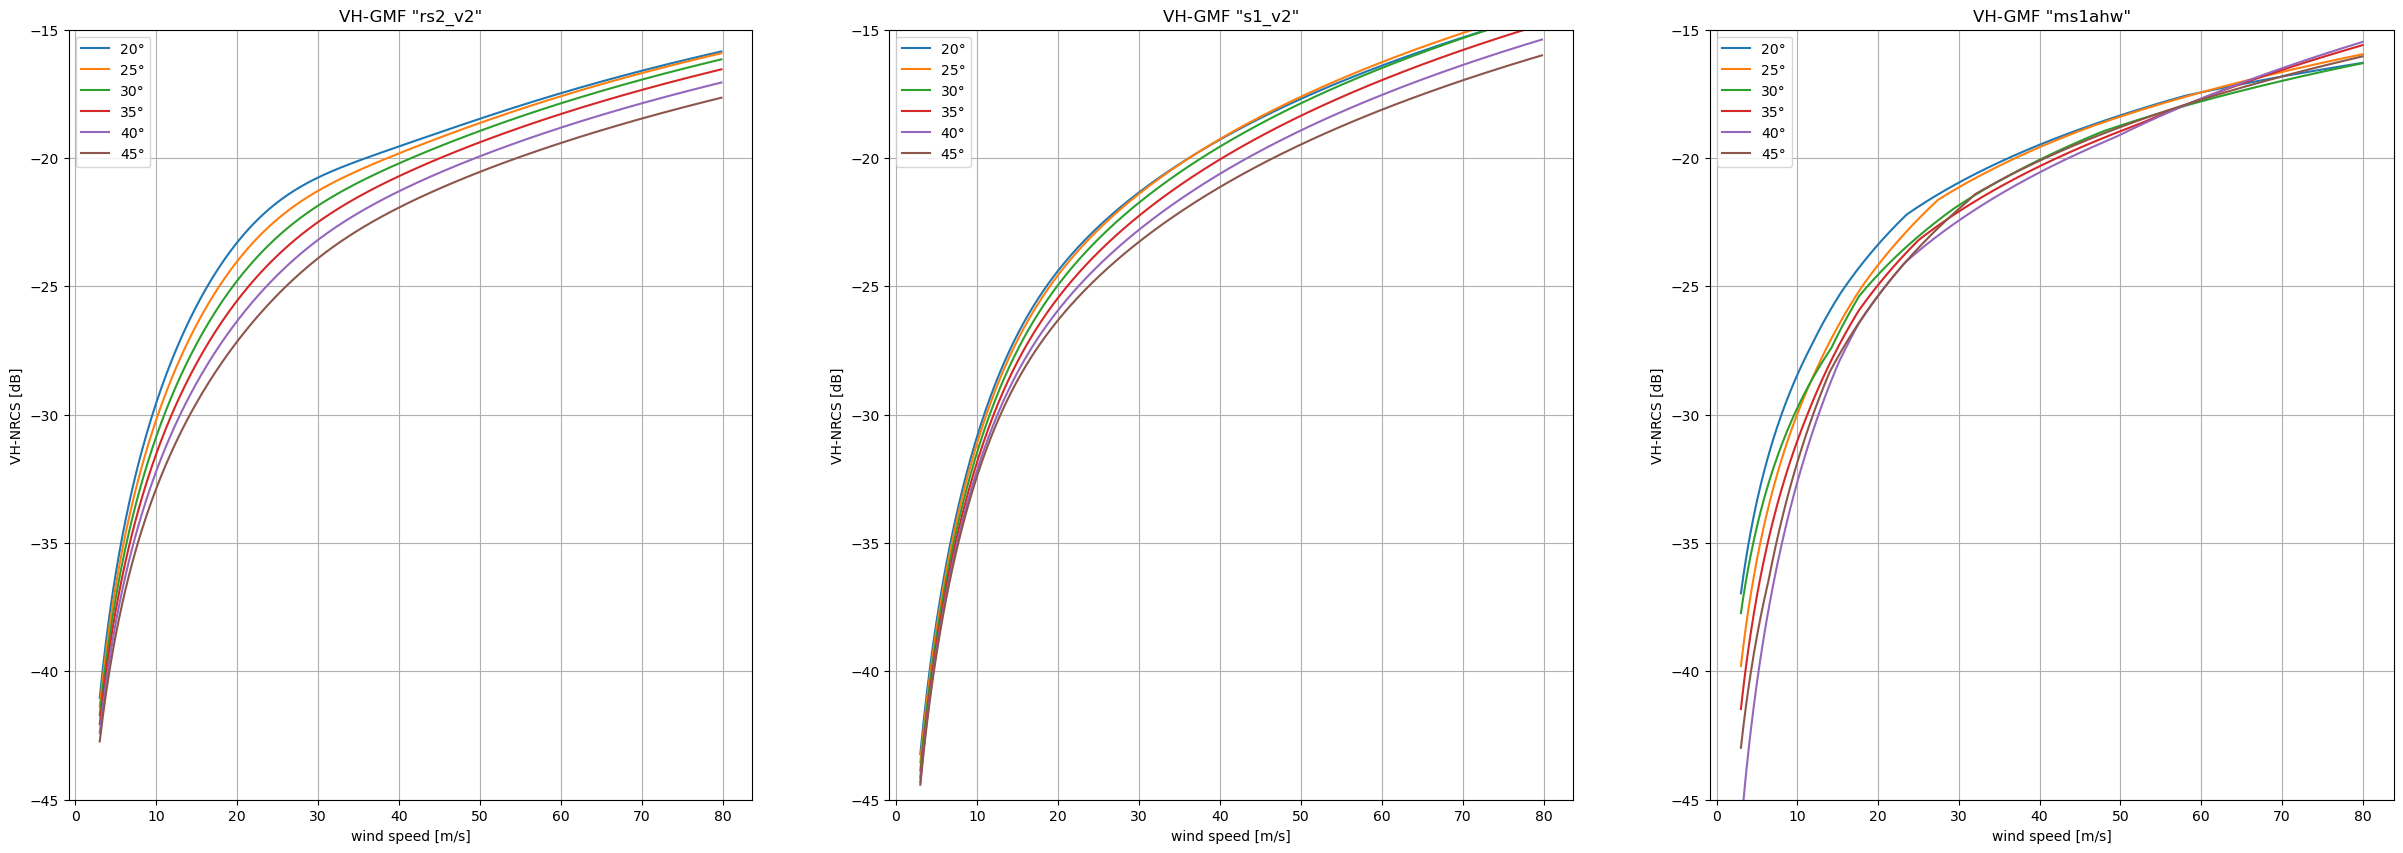

In [11]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(30, 10)

for i,inc in enumerate(np.arange(20,50,5)):
    axs[0].plot(sigma0_rs2_v2.wspd,10*np.log10(sigma0_rs2_v2.sel(inc=inc)),label=str(inc)+"°")
    axs[1].plot(sigma0_s1.wspd,10*np.log10(sigma0_s1.sel(inc=inc)),label=str(inc)+"°")
    axs[2].plot(sigma0_ms1ahw_dB.wspd,sigma0_ms1ahw_dB.sel(inc=inc),label=str(inc)+"°")



axs[0].set_title('VH-GMF "rs2_v2"')
axs[1].set_title('VH-GMF "s1_v2"')
axs[2].set_title('VH-GMF "ms1ahw"')

for ax in axs : 
    
    ax.legend()
    ax.grid()
    ax.set_ylim((-45,-15))
    ax.set_xlabel("wind speed [m/s]")
    ax.set_ylabel("VH-NRCS [dB]")

# New Plot example RS2 

Text(0.5, 1.0, 'Comparison of VH-GMF "rs2_v2" and "rs2_v4"')

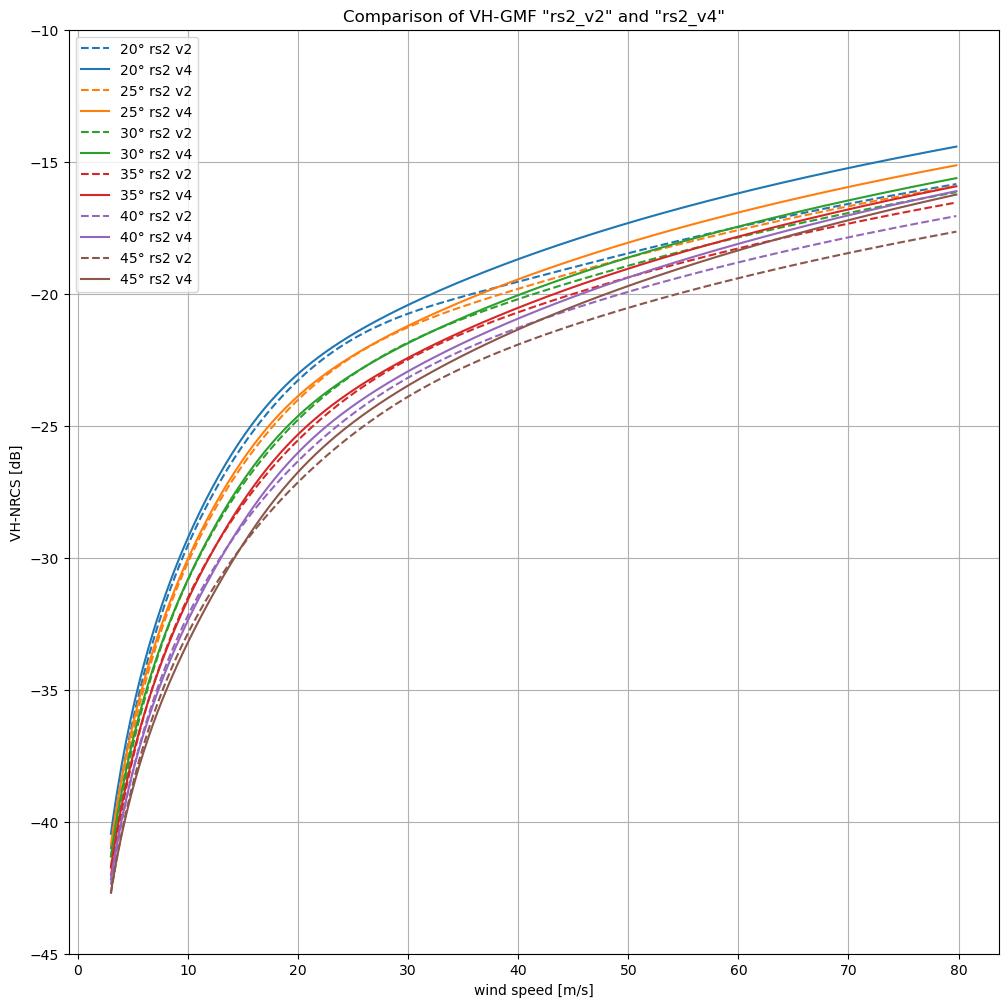

In [12]:
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 12)

# assure same colors and linestyles for both models

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,inc in enumerate(np.arange(20,50,5)):
    axs.plot(sigma0_rs2_v2.wspd,10*np.log10(sigma0_rs2_v2.sel(inc=inc)), linestyle='dashed', label=str(inc)+"° rs2 v2", color=colors[i])
    axs.plot(sigma0_rs2_v4.wspd,10*np.log10(sigma0_rs2_v4.sel(inc=inc)), linestyle='solid', label=str(inc)+"° rs2 v4", color=colors[i])


axs.legend()
axs.grid()
axs.set_ylim((-45,-10))
axs.set_xlabel("wind speed [m/s]")
axs.set_ylabel("VH-NRCS [dB]")
axs.set_title('Comparison of VH-GMF "rs2_v2" and "rs2_v4"')

# New Plot Example S1
 

Text(0.5, 1.0, 'Comparison of VH-GMF "s1_v2" and "s1_ew_rec"')

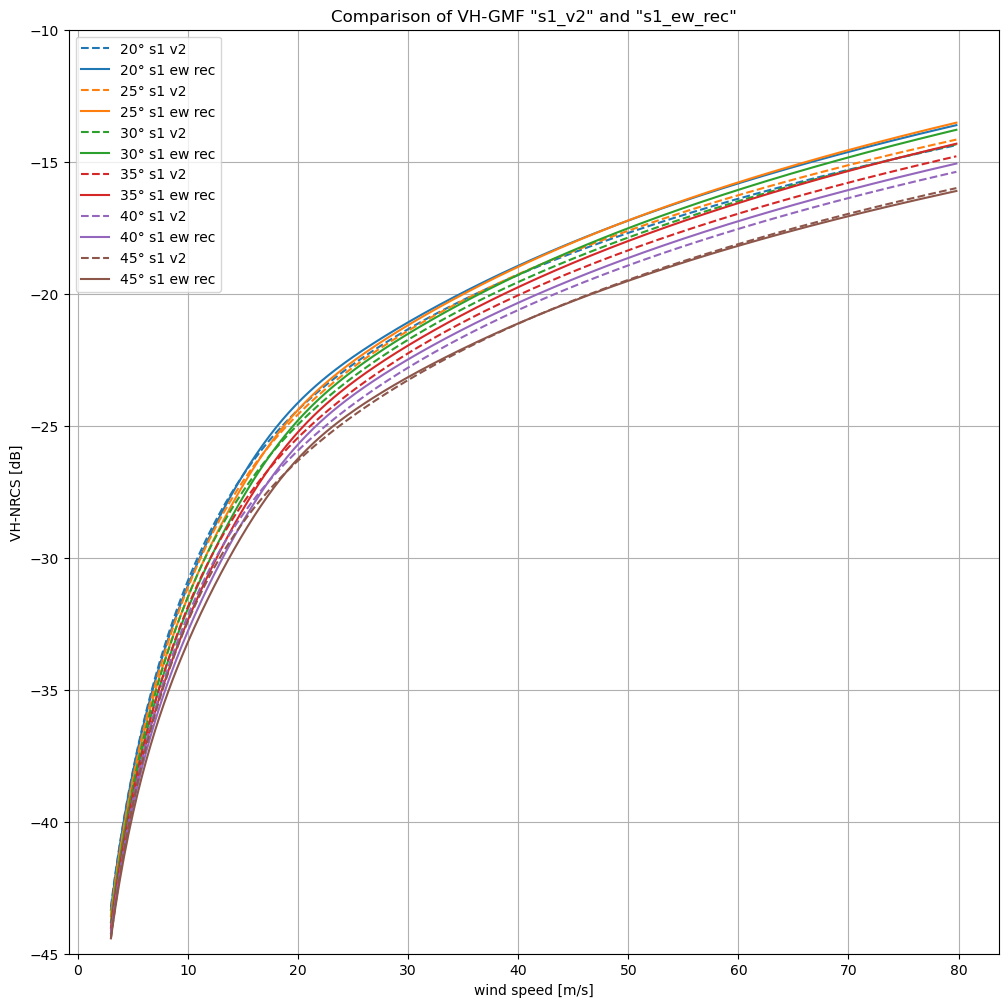

In [16]:
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 12)

# assure same colors and linestyles for both models

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,inc in enumerate(np.arange(20,50,5)):
    axs.plot(sigma0_s1.wspd,10*np.log10(sigma0_s1.sel(inc=inc)), linestyle='dashed', label=str(inc)+"° s1 v2", color=colors[i])
    axs.plot(sigma0_s1_v3_ew_rec.wspd,10*np.log10(sigma0_s1_v3_ew_rec.sel(inc=inc)), linestyle='solid', label=str(inc)+"° s1 ew rec", color=colors[i])


axs.legend()
axs.grid()
axs.set_ylim((-45,-10))
axs.set_xlabel("wind speed [m/s]")
axs.set_ylabel("VH-NRCS [dB]")
axs.set_title('Comparison of VH-GMF "s1_v2" and "s1_ew_rec"')

# Plot Example RCM 

Text(0.5, 1.0, 'Comparison of VH-GMF "rcm_noaa" and "rcm_v4"')

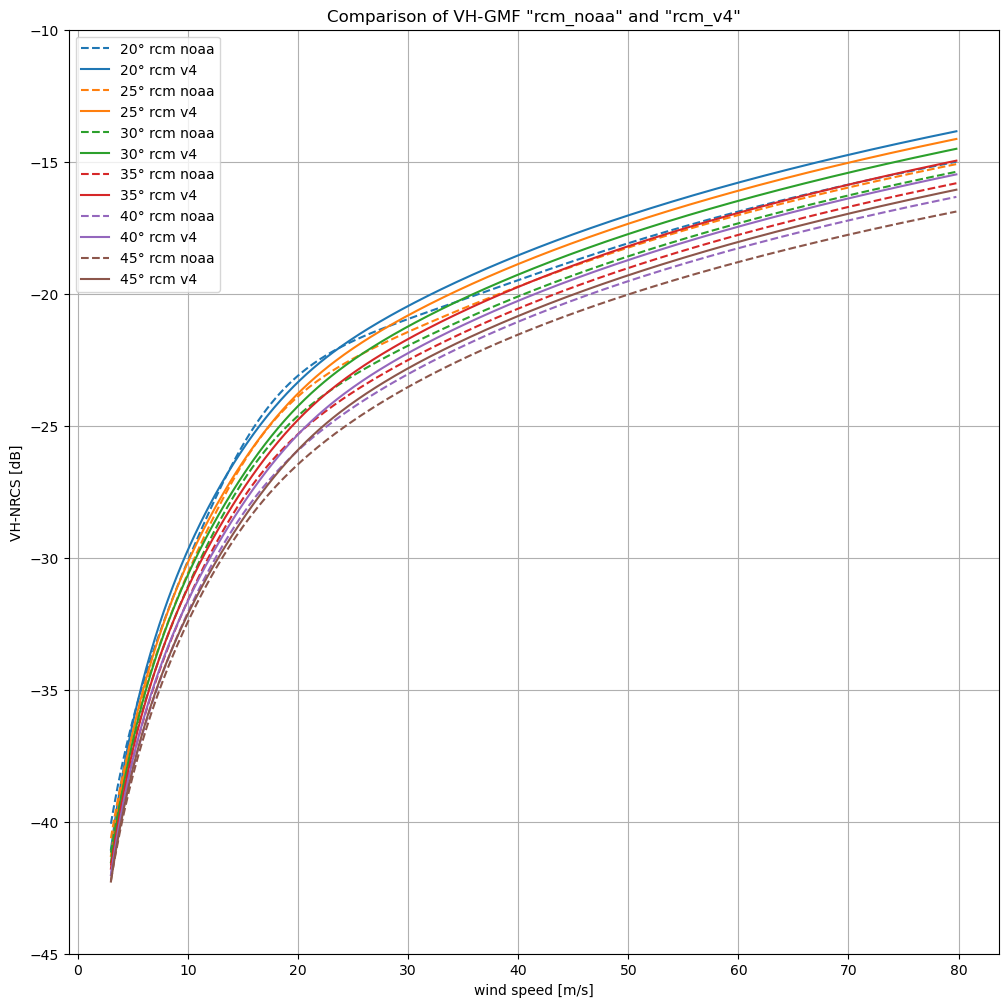

In [15]:
fig, axs = plt.subplots(1, 1)
fig.set_size_inches(12, 12)

# assure same colors and linestyles for both models

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i,inc in enumerate(np.arange(20,50,5)):
    axs.plot(sigma0_rcm_noaa.wspd,10*np.log10(sigma0_rcm_noaa.sel(inc=inc)), linestyle='dashed', label=str(inc)+"° rcm noaa", color=colors[i])
    axs.plot(sigma0_rcm_v4.wspd,10*np.log10(sigma0_rcm_v4.sel(inc=inc)), linestyle='solid', label=str(inc)+"° rcm v4", color=colors[i])


axs.legend()
axs.grid()
axs.set_ylim((-45,-10))
axs.set_xlabel("wind speed [m/s]")
axs.set_ylabel("VH-NRCS [dB]")
axs.set_title('Comparison of VH-GMF "rcm_noaa" and "rcm_v4"')